In [52]:
import pandas as pd

In [120]:
netflix_data = pd.read_csv('ViewingActivity.csv')

In [122]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2543 entries, 0 to 2542
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Profile Name             2543 non-null   object
 1   Start Time               2543 non-null   object
 2   Duration                 2543 non-null   object
 3   Attributes               975 non-null    object
 4   Title                    2543 non-null   object
 5   Supplemental Video Type  241 non-null    object
 6   Device Type              2542 non-null   object
 7   Bookmark                 2543 non-null   object
 8   Latest Bookmark          2543 non-null   object
 9   Country                  2543 non-null   object
dtypes: object(10)
memory usage: 198.8+ KB


In [123]:
netflix_data.shape

(2543, 10)

In [124]:
netflix_data = netflix_data.drop(['Profile Name','Attributes','Supplemental Video Type','Device Type','Bookmark','Latest Bookmark','Country'],axis=1)

In [125]:
netflix_data.head()

,Start Time,Duration,Title
0,2020-11-07 12:15:50,00:15:58,A Suitable Boy: Limited Series: Episode 1
1,2020-11-07 12:11:47,00:03:02,A Suitable Boy: Limited Series: Episode 1
2,2020-11-07 11:45:25,00:04:37,A Suitable Boy: Limited Series: Episode 1
3,2020-11-07 10:41:10,00:11:59,The 100: Season 7: Welcome to Bardo (Episode 5)
4,2020-11-07 10:38:27,00:02:35,The 100: Season 7: Hesperides (Episode 4)


In [126]:
netflix_data.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

In [127]:
netflix_data['Start Time'] = pd.to_datetime(netflix_data['Start Time'],utc=True)
netflix_data.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [128]:
#change the start TIme column into the dataframe's index
netflix_data = netflix_data.set_index('Start Time')

#convert from utc timezone to eastern time(we can only use .tz_convert() on a DatetimeIndex)
netflix_data.index = netflix_data.index.tz_convert('Asia/Calcutta')

#reset the index so that start time becomes a column again
netflix_data = netflix_data.reset_index()

In [129]:
netflix_data.head()

,Start Time,Duration,Title
0,2020-11-07 17:45:50+05:30,00:15:58,A Suitable Boy: Limited Series: Episode 1
1,2020-11-07 17:41:47+05:30,00:03:02,A Suitable Boy: Limited Series: Episode 1
2,2020-11-07 17:15:25+05:30,00:04:37,A Suitable Boy: Limited Series: Episode 1
3,2020-11-07 16:11:10+05:30,00:11:59,The 100: Season 7: Welcome to Bardo (Episode 5)
4,2020-11-07 16:08:27+05:30,00:02:35,The 100: Season 7: Hesperides (Episode 4)


In [130]:
netflix_data.head(1)

,Start Time,Duration,Title
0,2020-11-07 17:45:50+05:30,00:15:58,A Suitable Boy: Limited Series: Episode 1


In [131]:
netflix_data['Duration'] = pd.to_timedelta(netflix_data['Duration'])
netflix_data.dtypes

Start Time    datetime64[ns, Asia/Calcutta]
Duration                    timedelta64[ns]
Title                                object
dtype: object

In [132]:
netflix_data['Title']

0               A Suitable Boy: Limited Series: Episode 1
1               A Suitable Boy: Limited Series: Episode 1
2               A Suitable Boy: Limited Series: Episode 1
3         The 100: Season 7: Welcome to Bardo (Episode 5)
4               The 100: Season 7: Hesperides (Episode 4)
                              ...                        
2538    HIDDEN TITLE: The Big Bang Theory: Season 3: T...
2539    HIDDEN TITLE: The Big Bang Theory: Season 3: T...
2540    HIDDEN TITLE: The Big Bang Theory: Season 3: T...
2541    HIDDEN TITLE: The Big Bang Theory: Season 3: T...
2542    HIDDEN TITLE: The Big Bang Theory: Season 3: T...
Name: Title, Length: 2543, dtype: object

In [133]:
BBT = netflix_data[netflix_data['Title'].str.contains('The Big Bang Theory',regex=False)]

In [134]:
BBT.head()

,Start Time,Duration,Title
33,2020-11-04 22:35:39+05:30,00:08:45,The Big Bang Theory: Season 2: The Hofstadter ...
34,2020-11-03 22:28:42+05:30,00:00:26,The Big Bang Theory: Season 2: The Hofstadter ...
35,2020-11-03 22:09:25+05:30,00:19:14,The Big Bang Theory: Season 2: The Dead Hooker...
73,2020-10-29 22:39:54+05:30,00:00:04,The Big Bang Theory: Season 2: The Dead Hooker...
74,2020-10-29 22:25:47+05:30,00:14:05,The Big Bang Theory: Season 2: The Work Song N...


In [135]:
BBT.shape

(767, 3)

In [136]:
BBT = BBT[(BBT['Duration'] > '0 days 00:01:00')]
BBT.shape

(564, 3)

In [137]:
BBT['Duration'].sum()

Timedelta('4 days 06:02:08')

In [138]:
BBT['weekday'] = BBT['Start Time'].dt.weekday
BBT['hour'] = BBT['Start Time'].dt.hour

In [139]:
BBT.head()

,Start Time,Duration,Title,weekday,hour
33,2020-11-04 22:35:39+05:30,00:08:45,The Big Bang Theory: Season 2: The Hofstadter ...,2,22
35,2020-11-03 22:09:25+05:30,00:19:14,The Big Bang Theory: Season 2: The Dead Hooker...,1,22
74,2020-10-29 22:25:47+05:30,00:14:05,The Big Bang Theory: Season 2: The Work Song N...,3,22
217,2020-10-20 23:42:08+05:30,00:05:22,The Big Bang Theory: Season 2: The Work Song N...,1,23
218,2020-10-20 23:38:42+05:30,00:03:23,The Big Bang Theory: Season 2: The Terminator ...,1,23


In [140]:
import matplotlib.pyplot
%matplotlib inline

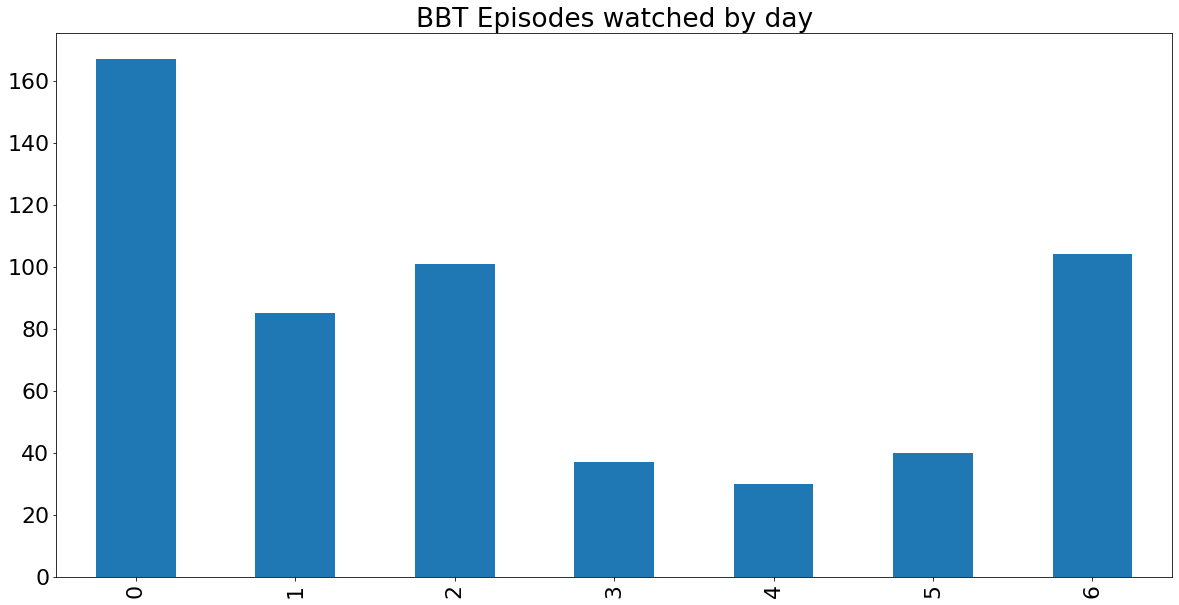

In [141]:
BBT['weekday'] = pd.Categorical(BBT['weekday'],categories=[0,1,2,3,4,5,6],ordered=True)
BBT_by_day = BBT['weekday'].value_counts()
BBT_by_day = BBT_by_day.sort_index()
matplotlib.rcParams.update({'font.size':22})
BBT_by_day.plot(kind='bar',figsize=(20,10),title='BBT Episodes watched by day')

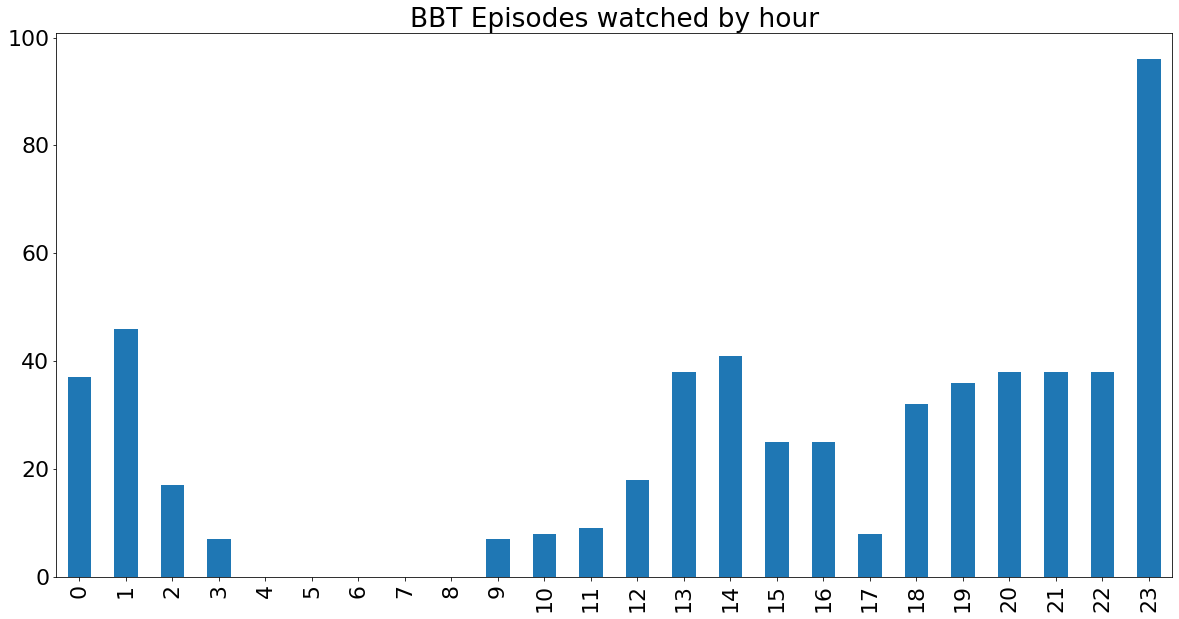

In [142]:
BBT['hour'] = pd.Categorical(BBT['hour'],categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],ordered=True)
BBT_by_hour = BBT['hour'].value_counts()
BBT_by_hour = BBT_by_hour.sort_index()
matplotlib.rcParams.update({'font.size':22})
BBT_by_hour.plot(kind='bar',figsize=(20,10),title='BBT Episodes watched by hour')

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline

In [145]:
import seaborn as sns

Text(0.5, 1.0, 'episodes watched by weekday')

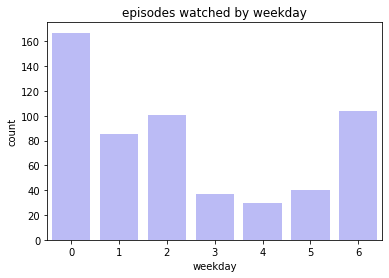

In [155]:
sns.countplot(x='weekday',data=BBT,color='blue',alpha=0.3)
plt.title('episodes watched by weekday')

Text(0.5, 1.0, 'episodes watched by hour')

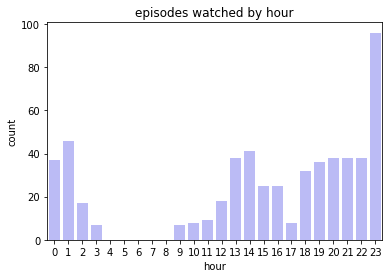

In [159]:
sns.countplot(x='hour',data=BBT,color='blue',alpha=0.3)
plt.title('episodes watched by hour')